In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
df=pd.read_csv('ESMI Karnataka data 2016-18.csv')
df.head()

,Location ID,Location name,Town,Revenue classification,Connection type,Date,Hour of the day,Min 0,Min 1,Min 2,...,Min 50,Min 51,Min 52,Min 53,Min 54,Min 55,Min 56,Min 57,Min 58,Min 59
0,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,0,249,250,247,...,246,246,247,247,247,247,247,248,248,248
1,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,1,248,249,249,...,250,250,250,250,250,251,251,251,251,251
2,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,2,251,251,251,...,252,252,252,252,252,252,253,253,253,253
3,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,3,252,253,253,...,251,251,251,251,251,251,251,251,251,251
4,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,4,251,251,252,...,248,249,249,249,249,249,250,249,250,250


In [3]:
df.shape

(595393, 67)

In [4]:
df.columns

Index(['Location ID', 'Location name', 'Town', 'Revenue classification',
       'Connection type', 'Date', 'Hour of the day', 'Min 0', 'Min 1', 'Min 2',
       'Min 3', 'Min 4', 'Min 5', 'Min 6', 'Min 7', 'Min 8', 'Min 9', 'Min 10',
       'Min 11', 'Min 12', 'Min 13', 'Min 14', 'Min 15', 'Min 16', 'Min 17',
       'Min 18', 'Min 19', 'Min 20', 'Min 21', 'Min 22', 'Min 23', 'Min 24',
       'Min 25', 'Min 26', 'Min 27', 'Min 28', 'Min 29', 'Min 30', 'Min 31',
       'Min 32', 'Min 33', 'Min 34', 'Min 35', 'Min 36', 'Min 37', 'Min 38',
       'Min 39', 'Min 40', 'Min 41', 'Min 42', 'Min 43', 'Min 44', 'Min 45',
       'Min 46', 'Min 47', 'Min 48', 'Min 49', 'Min 50', 'Min 51', 'Min 52',
       'Min 53', 'Min 54', 'Min 55', 'Min 56', 'Min 57', 'Min 58', 'Min 59'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595393 entries, 0 to 595392
Data columns (total 67 columns):
Location ID               595393 non-null int64
Location name             595393 non-null object
Town                      595393 non-null object
Revenue classification    595393 non-null object
Connection type           595393 non-null object
Date                      595393 non-null object
Hour of the day           595393 non-null int64
Min 0                     595393 non-null int64
Min 1                     595393 non-null int64
Min 2                     595393 non-null int64
Min 3                     595393 non-null int64
Min 4                     595393 non-null int64
Min 5                     595393 non-null int64
Min 6                     595393 non-null int64
Min 7                     595393 non-null int64
Min 8                     595393 non-null int64
Min 9                     595393 non-null int64
Min 10                    595393 non-null int64
Min 11              

Here let us assume that the coluns Min0,Min1 etc. represents power consumption per minute. 

In [6]:
print(df['Location name'].value_counts())

Yelahanka - Bengaluru                      26280
Guddiangadi                                26209
Brahmavar                                  25981
Bhagyanagar-Belgaum                        25184
Rajaji Nagar- Bengaluru                    24955
Srirampura-Bengaluru                       24921
Ramesh Nagar- Bengaluru                    24288
Shivaji Nagar- Belgaum                     21957
Nippani                                    21933
Chandra Layout- Bengaluru                  21156
Sadashiv Nagar- Belgaum                    21110
Khade Bazar - Belgaum [Offline]            20900
Jamboti - Belagum                          20175
Mudur [Offline]                            20019
Angol- Belgaum                             19297
Udyambaug-Belgaum [Offline]                18371
Halbhavi Camp- Belgaum                     18079
JP Nagar                                   17791
Congress Road-Belgaum                      16934
Sri Ram Rang Pura-Bellary                  15527
Basaweshwara Nagar- 

In [7]:
df.columns[df.isnull().any()]

Index(['Min 22', 'Min 29', 'Min 49'], dtype='object')

In [8]:
df.isnull().sum().sum()

3

In [9]:
df.dropna(inplace=True)
df.shape

(595390, 67)

In [10]:
df['Total power consumption(Units)']=df[df.columns[7:]].sum(axis=1)

In [11]:
df.head()

,Location ID,Location name,Town,Revenue classification,Connection type,Date,Hour of the day,Min 0,Min 1,Min 2,...,Min 51,Min 52,Min 53,Min 54,Min 55,Min 56,Min 57,Min 58,Min 59,Total power consumption(Units)
0,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,0,249,250,247,...,246,247,247,247,247,247,248,248,248,14772.0
1,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,1,248,249,249,...,250,250,250,250,251,251,251,251,251,14981.0
2,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,2,251,251,251,...,252,252,252,252,252,253,253,253,253,15088.0
3,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,3,252,253,253,...,251,251,251,251,251,251,251,251,251,15070.0
4,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,4,251,251,252,...,249,249,249,249,249,250,249,250,250,14976.0


Calculating total power consumption would allow us to do univariate and multivariate analysis of different categorical variables.

In [12]:
df=df.drop(df.columns[7:-1],axis=1)

In [13]:
df.head()

,Location ID,Location name,Town,Revenue classification,Connection type,Date,Hour of the day,Total power consumption(Units)
0,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,0,14772.0
1,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,1,14981.0
2,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,2,15088.0
3,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,3,15070.0
4,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,4,14976.0


In [14]:

df['Total power consumption(KUnits)']=df['Total power consumption(Units)']/1000
df['Total power in KUnits']=df['Total power consumption(KUnits)']
df.drop(['Total power consumption(Units)'],axis=1,inplace=True)
df

,Location ID,Location name,Town,Revenue classification,Connection type,Date,Hour of the day,Total power consumption(KUnits),Total power in KUnits
0,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,0,14.772,14.772
1,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,1,14.981,14.981
2,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,2,15.088,15.088
3,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,3,15.070,15.070
4,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,4,14.976,14.976
5,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,5,14.994,14.994
6,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,6,14.795,14.795
7,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,7,14.706,14.706
8,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,8,14.581,14.581
9,154,Jayanagar- Bengaluru [Offline],Bengaluru,State capital,Domestic,1/1/2016,9,14.711,14.711


In [15]:
df1 = df.groupby(['Date','Location name','Town','Revenue classification','Connection type','Hour of the day'], as_index=False)['Total power in KUnits'].sum()
df1.head()

,Date,Location name,Town,Revenue classification,Connection type,Hour of the day,Total power in KUnits
0,1/1/2016,Angol- Belgaum,Belgaum,District headquarters,Domestic,0,15.192
1,1/1/2016,Angol- Belgaum,Belgaum,District headquarters,Domestic,1,15.321
2,1/1/2016,Angol- Belgaum,Belgaum,District headquarters,Domestic,2,15.381
3,1/1/2016,Angol- Belgaum,Belgaum,District headquarters,Domestic,3,14.598
4,1/1/2016,Angol- Belgaum,Belgaum,District headquarters,Domestic,4,15.347


In [16]:
df2=df1.groupby(['Hour of the day'],as_index=False)['Total power in KUnits'].sum()
df2.head()

,Hour of the day,Total power in KUnits
0,0,352972.577
1,1,353700.191
2,2,354691.017
3,3,353886.569
4,4,351170.787


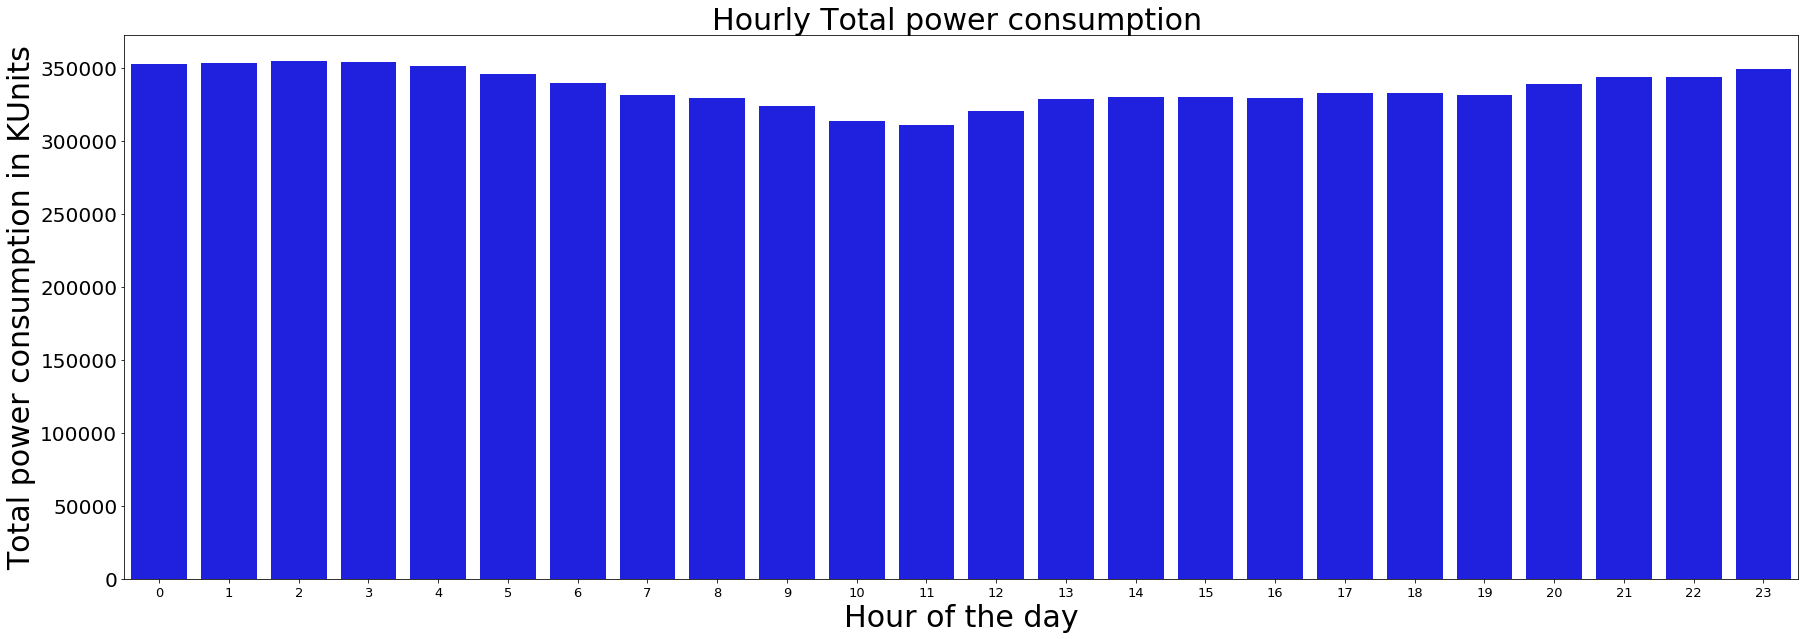

In [79]:
plt.figure(figsize=(30,10))
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=20) 

#plt.ylabel('Total power consumption')
sns.barplot(x='Hour of the day',y='Total power in KUnits',data=df2,color='blue')
plt.title('Hourly Total power consumption ', fontsize=30)

plt.xlabel('Hour of the day', fontsiz
plt.ylabel('Total power consumption in KUnits', fontsize=30)
plt.show()

plt.show()

observation: It can be observed that power consumption decreases from midnight and reaches lowest at around 11AM and again increases till midnight. Power consumption is high when the natural sunlight is not available. 

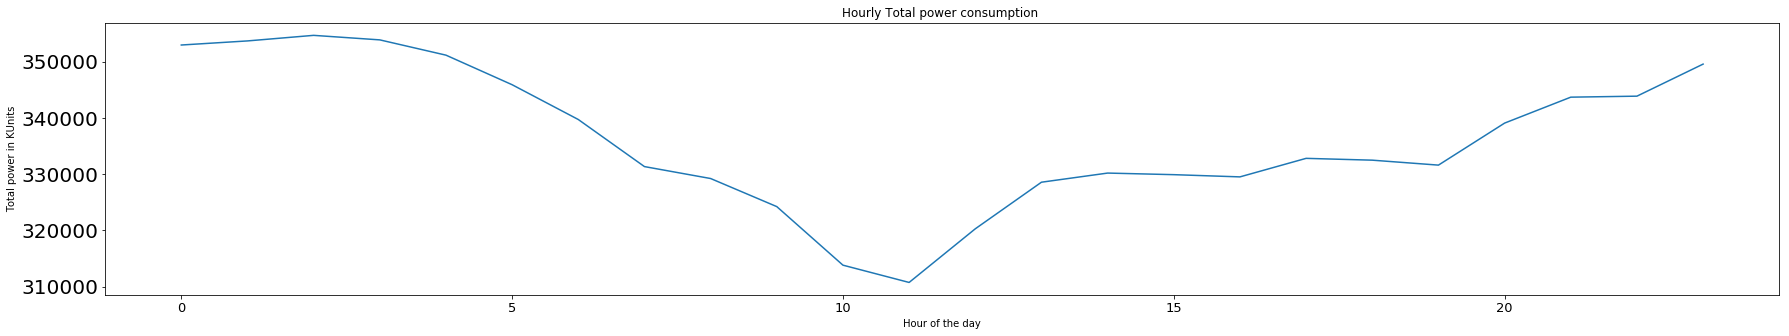

In [132]:
plt.figure(figsize=(30,5))
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=20) 

#plt.ylabel('Total power consumption')
sns.lineplot(x='Hour of the day',y='Total power in KUnits',data=df2)
plt.title('Hourly Total power consumption ')

plt.show()

In [133]:
df3=df1.groupby(['Town'],as_index=False)['Total power in KUnits'].sum()
df3.head(10)

,Town,Total power in KUnits
0,Anegundi,52601.429
1,Belgaum,2558233.144
2,Bengaluru,2841586.609
3,Brahmavar,354198.203
4,Hudem,24766.938
5,Jamboti,248197.556
6,Kannur,92019.212
7,Mudur,219632.688
8,Nakre,151289.928
9,Nippani,318715.100


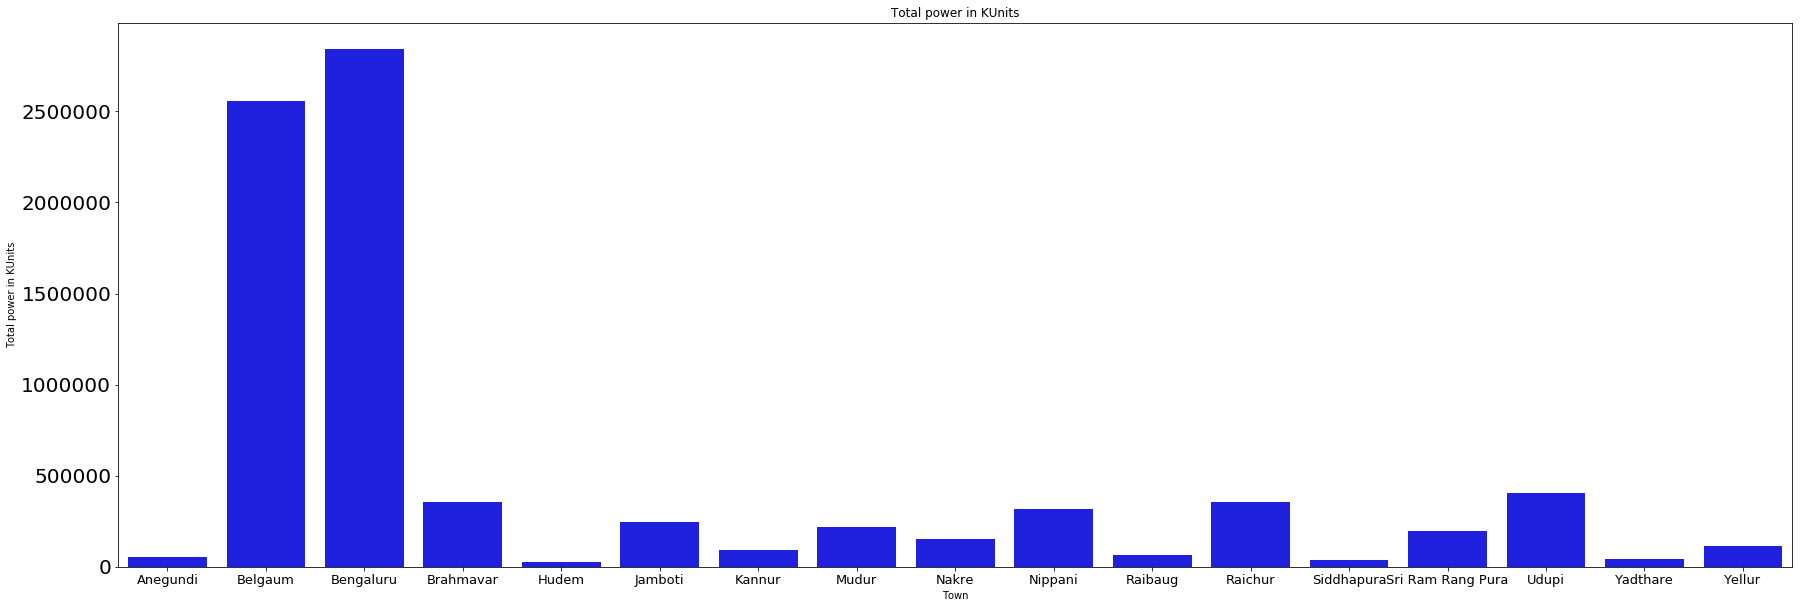

In [20]:
#https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
plt.figure(figsize=(30,10))
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=20) 

#plt.ylabel('Total power consumption')
sns.barplot(x='Town',y='Total power in KUnits',data=df3,color='blue')
plt.title('Total power in KUnits')

plt.show()

observation: Bengaluru and Belgaum has highest power consumption. As these two are industrilized places the consumption is significantly high when compared to other places.

([<matplotlib.patches.Wedge at 0x23510ed4748>,
 [Text(3.189331714439833, 0.06529330186376428, 'Anegundi'),
  Text(1.6245683101014055, 2.745337466654011, 'Belgaum'),
  Text(-3.1899766975703905, 0.012192988063010689, 'Bengaluru'),
  Text(-1.036705666992868, -3.0168429458665678, 'Brahmavar'),
  Text(-0.5821635224193233, -3.136428802502031, 'Hudem'),
  Text(-0.24634883557586235, -3.1804735891389533, 'Jamboti'),
  Text(0.17565181492344978, -3.185160347598547, 'Kannur'),
  Text(0.5597039085912602, -3.140514533433601, 'Mudur'),
  Text(1.0056204373587536, -3.0273466164227694, 'Nakre'),
  Text(1.5394662152118483, -2.7939477039166833, 'Nippani'),
  Text(1.935317170985996, -2.5358721276292226, 'Raibaug'),
  Text(2.3180870370183895, -2.191477238943472, 'Raichur'),
  Text(2.6231587808319707, -1.8152515006312837, 'Siddhapura'),
  Text(2.7764134569309884, -1.5708686501972464, 'Sri Ram Rang Pura'),
  Text(3.0648956604166506, -0.8845985477939605, 'Udupi'),
  Text(3.1721551655346185, -0.3369445143818749

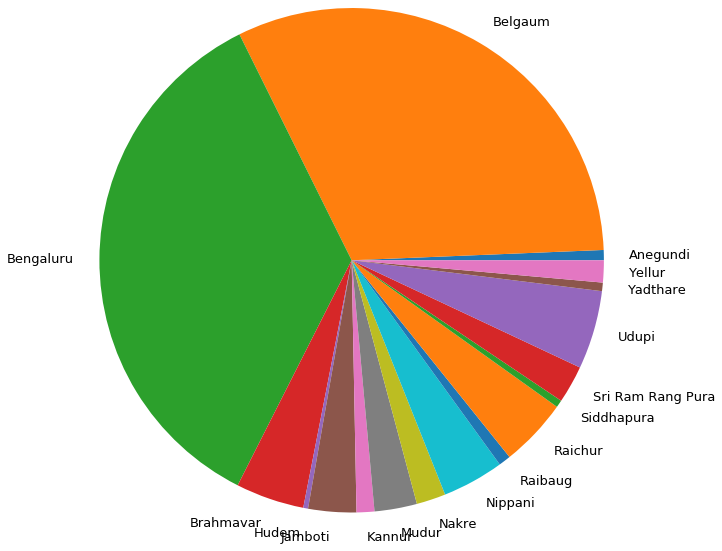

In [143]:
labels=list(df3['Town'])
plt.pie(df3['Total power in KUnits'],labels=labels,radius=2.9)


observation:It can be observed that about 75% of power conumption is in Bangalore and Belgaum. So, it is very important to do more analyses on these two places.

In [198]:
boolean=[]
for i in df1.Town.values:
    if i=="Bengaluru":
        boolean.append(True)
    else:
        boolean.append(False)
    

In [199]:
is_blur=pd.Series(boolean)
is_blur.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [23]:
df_blur=df1[is_blur]
df_blur.head()

,Date,Location name,Town,Revenue classification,Connection type,Hour of the day,Total power in KUnits
24,1/1/2016,Basaweshwara Nagar- Bengaluru,Bengaluru,State capital,Domestic,0,14.381
25,1/1/2016,Basaweshwara Nagar- Bengaluru,Bengaluru,State capital,Domestic,1,14.568
26,1/1/2016,Basaweshwara Nagar- Bengaluru,Bengaluru,State capital,Domestic,2,14.726
27,1/1/2016,Basaweshwara Nagar- Bengaluru,Bengaluru,State capital,Domestic,3,14.703
28,1/1/2016,Basaweshwara Nagar- Bengaluru,Bengaluru,State capital,Domestic,4,14.609


In [36]:
df_blur['Location name'].unique()

array(['Basaweshwara Nagar- Bengaluru', 'Chandra Layout- Bengaluru',
       'JP Nagar ', 'Jayanagar- Bengaluru [Offline]',
       'MCECHS Layout - Bengaluru [Offline]',
       'MarenHalli- Bengaluru [Offline]', 'Rajaji Nagar- Bengaluru',
       'Srirampura-Bengaluru', 'VV Puram - Bengaluru [Offline]',
       'Yelahanka - Bengaluru', 'BTM Layout- Bengaluru [Offline]',
       'Ramesh Nagar- Bengaluru', '5th phase JP Nagar- Bengaluru',
       'Galagihulukoppa-Dharwad [Offline]'], dtype=object)

Here it can be observed that Galagihulukoppa is in Dharwad but it is listed with Bangalore. So it is better to remove that location name from df_blur to avoid confusion.

In [200]:
df_blur=df_blur[df_blur['Location name']!="Galagihulukoppa-Dharwad [Offline]"]
df_blur.head()

,Date,Location name,Town,Revenue classification,Connection type,Hour of the day,Total power in KUnits
24,1/1/2016,Basaweshwara Nagar- Bengaluru,Bengaluru,State capital,Domestic,0,14.381
25,1/1/2016,Basaweshwara Nagar- Bengaluru,Bengaluru,State capital,Domestic,1,14.568
26,1/1/2016,Basaweshwara Nagar- Bengaluru,Bengaluru,State capital,Domestic,2,14.726
27,1/1/2016,Basaweshwara Nagar- Bengaluru,Bengaluru,State capital,Domestic,3,14.703
28,1/1/2016,Basaweshwara Nagar- Bengaluru,Bengaluru,State capital,Domestic,4,14.609


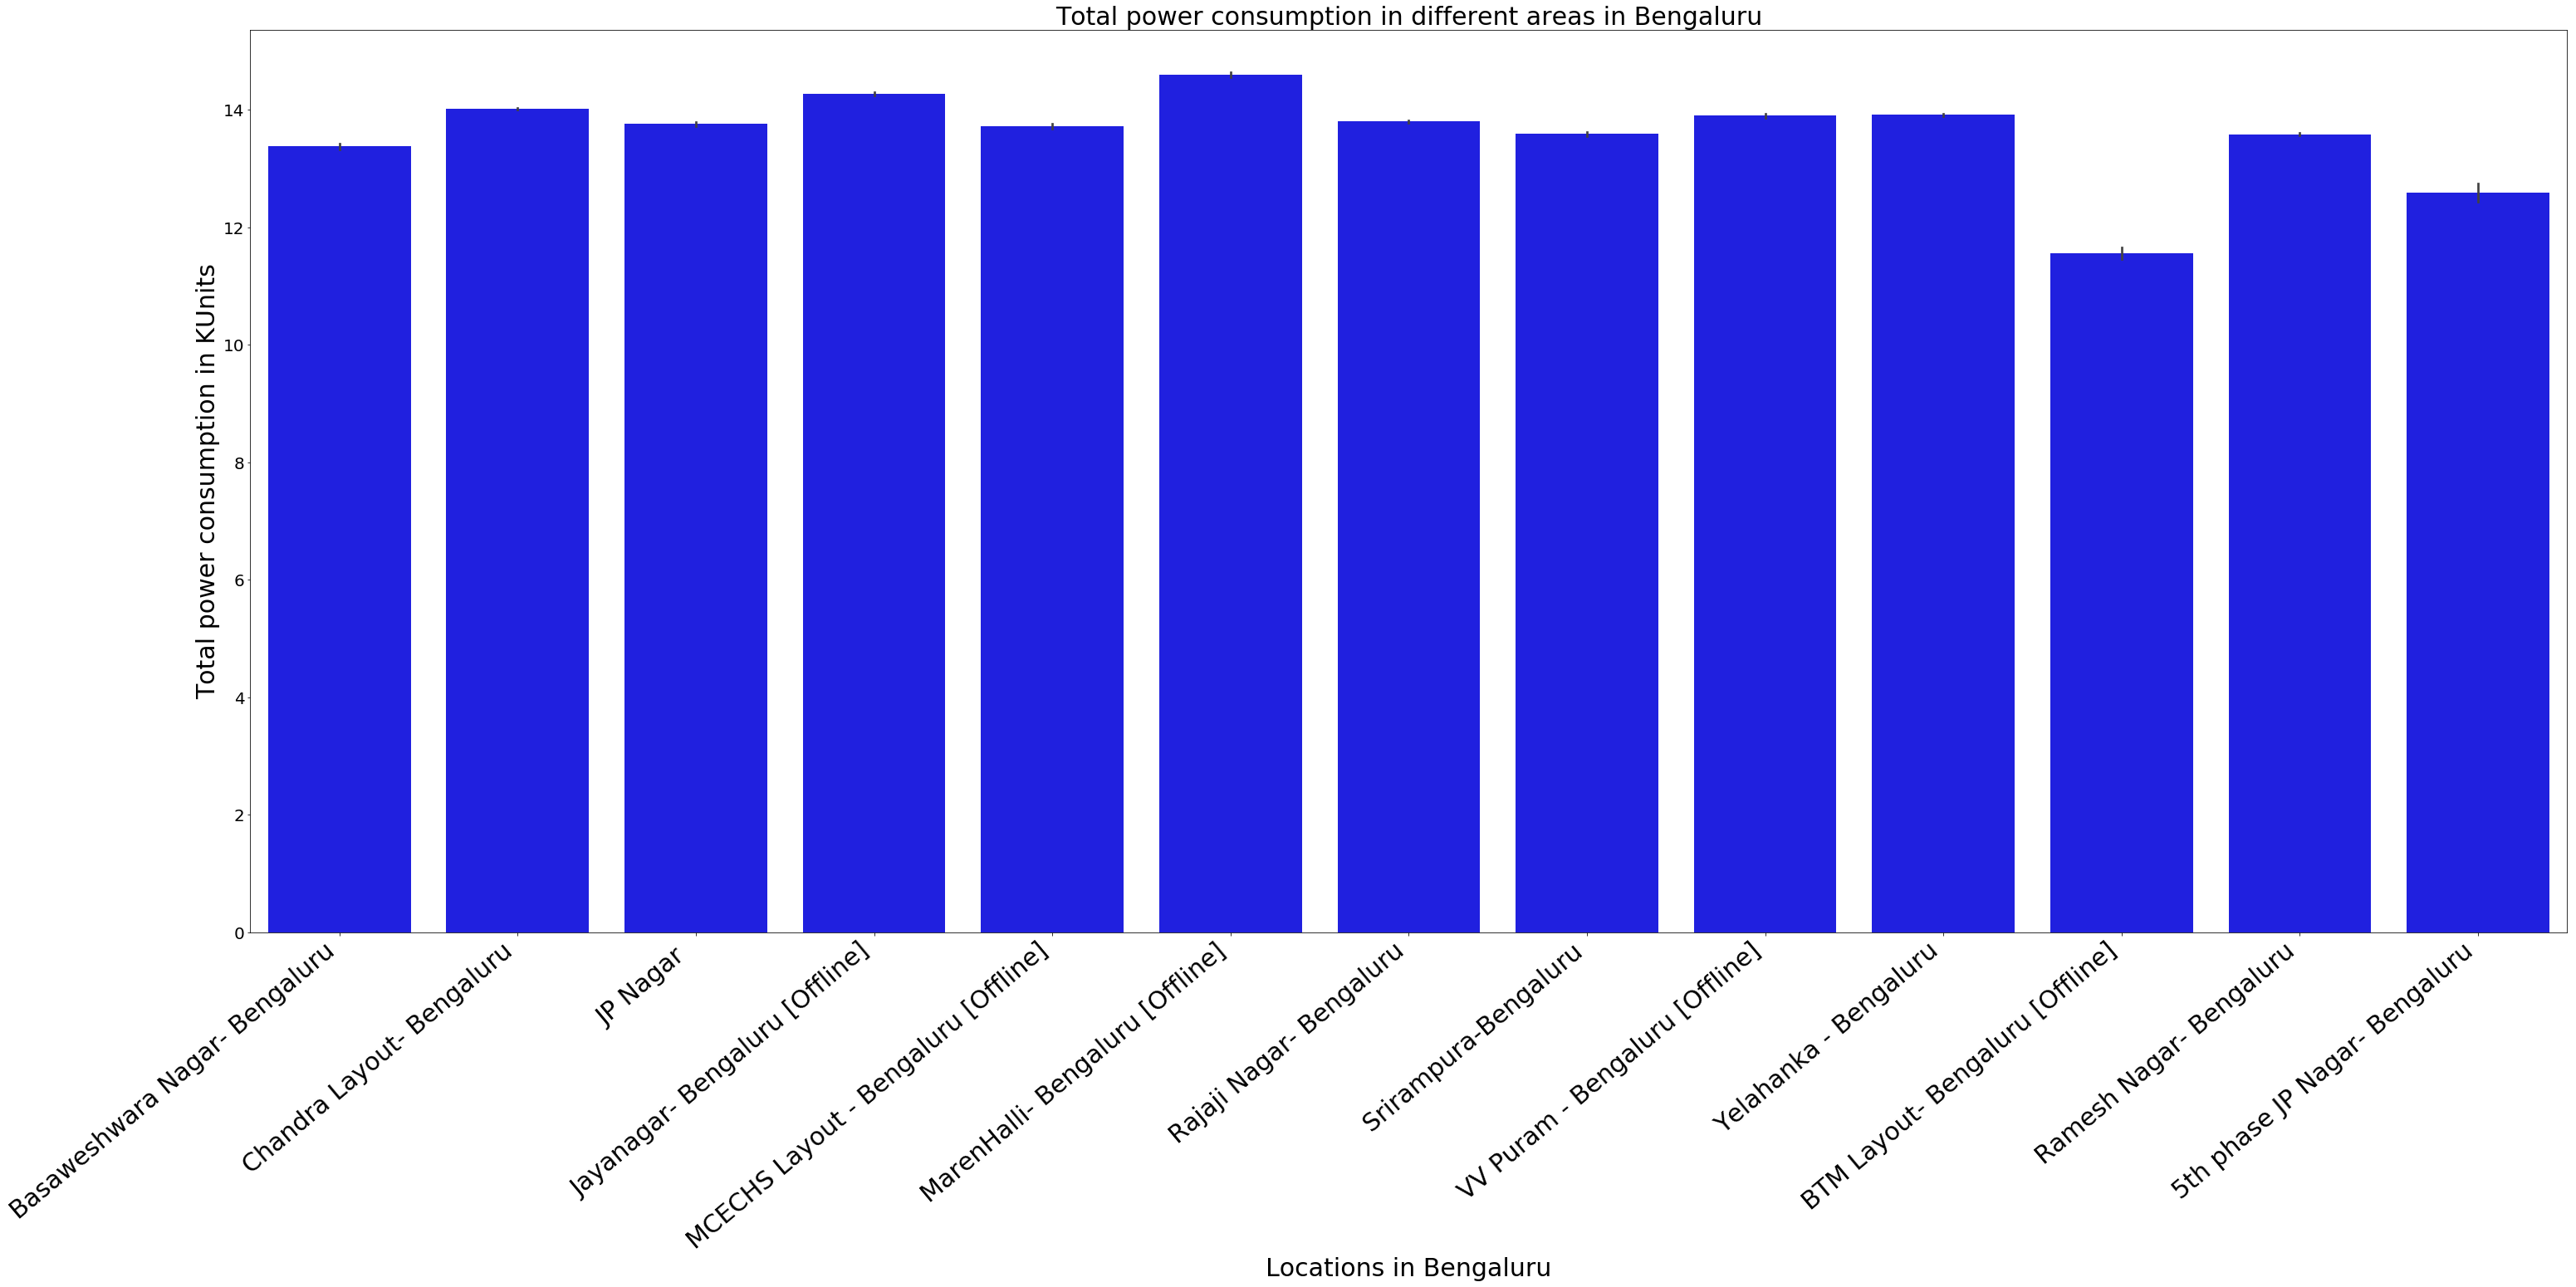

In [78]:
plt.figure(figsize=(50,20))
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=20) 

#plt.ylabel('Total power consumption')
ax=sns.barplot(x='Location name',y='Total power in KUnits',data=df_blur,color='blue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Total power consumption in different areas in Bengaluru',fontsize=30)

plt.xlabel('Locations in Bengaluru', fontsize=30)
plt.ylabel('Total power consumption in KUnits', fontsize=30)
plt.show()

plt.show()

In [58]:
df_blur['Connection type'].value_counts()

Domestic        162961
Non Domestic     42712
Name: Connection type, dtype: int64

observation:
It can be observed that the power consumption in some of the major residential areas is on par with industrial/commercial areas. This is because the number of domestic connection is around 4 time non domestic connection.

In [59]:
boolean1=[]
for i in df1.Town.values:
    if i=="Belgaum":
        boolean1.append(True)
    else:
        boolean1.append(False)
    

In [60]:
is_belg=pd.Series(boolean1)
df_belg=df1[is_belg]
df_belg.head()

,Date,Location name,Town,Revenue classification,Connection type,Hour of the day,Total power in KUnits
0,1/1/2016,Angol- Belgaum,Belgaum,District headquarters,Domestic,0,15.192
1,1/1/2016,Angol- Belgaum,Belgaum,District headquarters,Domestic,1,15.321
2,1/1/2016,Angol- Belgaum,Belgaum,District headquarters,Domestic,2,15.381
3,1/1/2016,Angol- Belgaum,Belgaum,District headquarters,Domestic,3,14.598
4,1/1/2016,Angol- Belgaum,Belgaum,District headquarters,Domestic,4,15.347


In [61]:
df_belg['Connection type'].value_counts()

Domestic        165671
Non Domestic     16934
Name: Connection type, dtype: int64

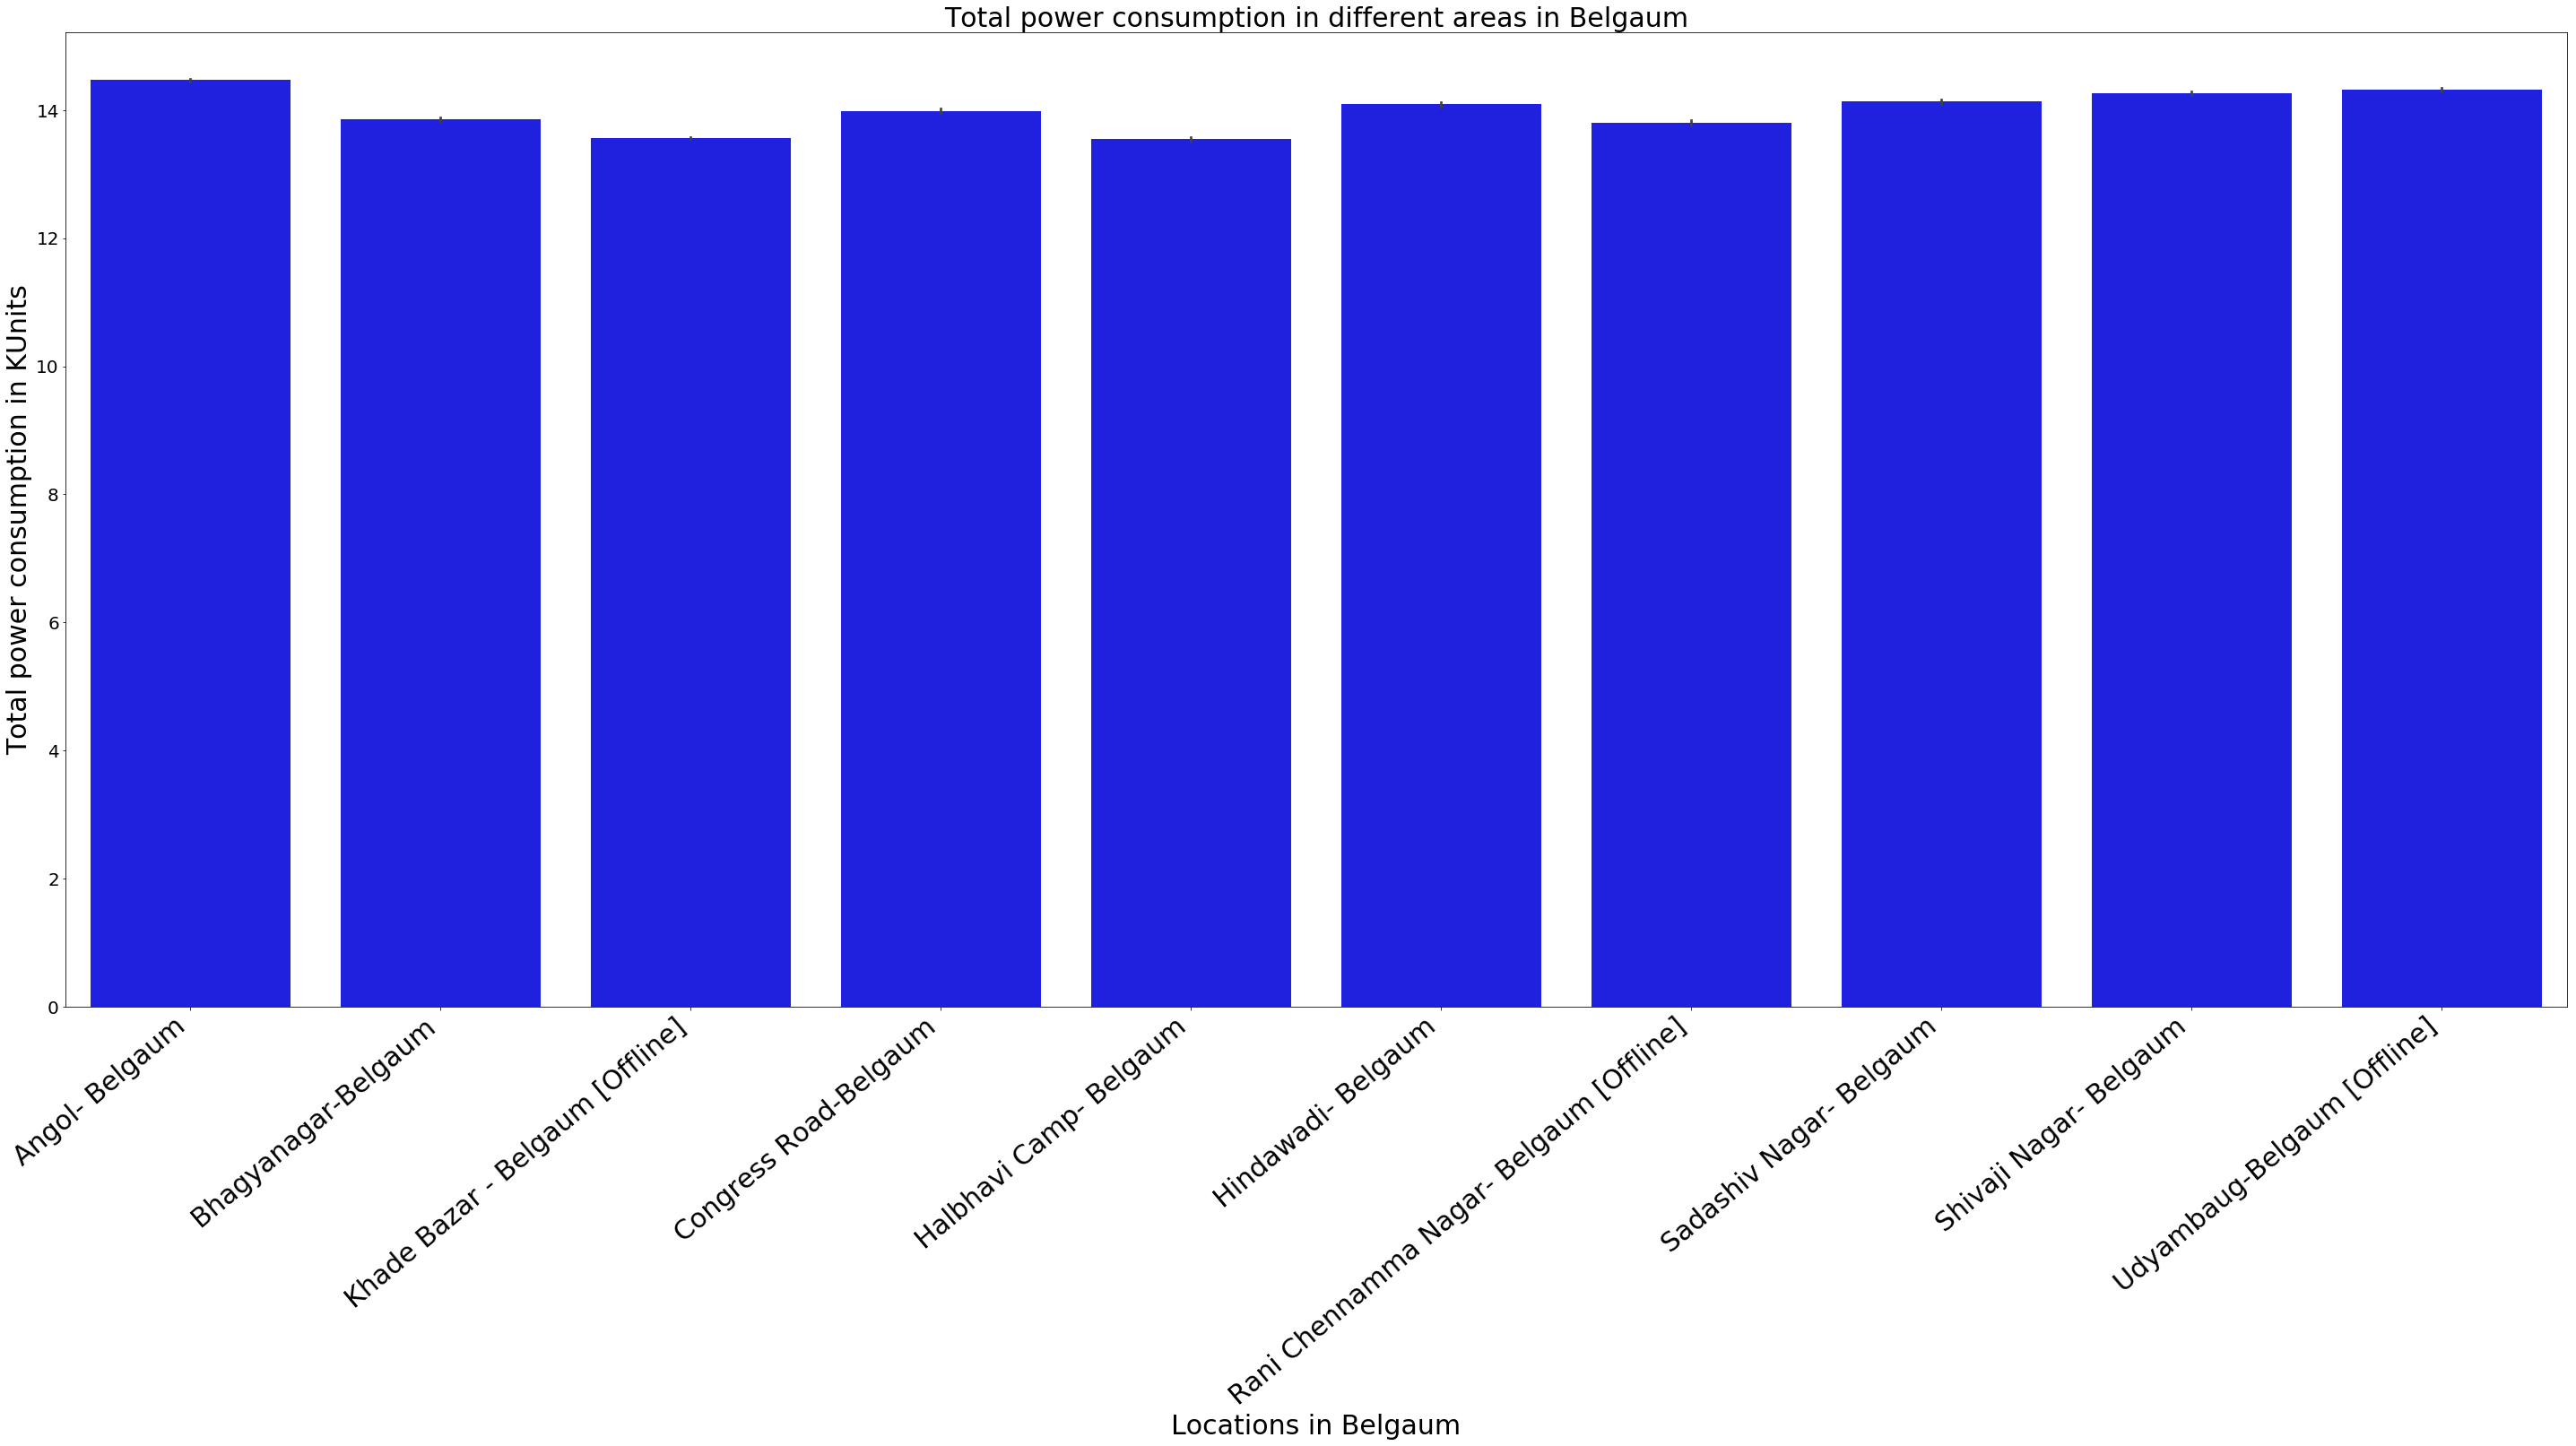

In [76]:
plt.figure(figsize=(50,20))
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=20) 


ax=sns.barplot(x='Location name',y='Total power in KUnits',data=df_belg,color='blue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Total power consumption in different areas in Belgaum',fontsize=30)

plt.xlabel('Locations in Belgaum', fontsize=30)
plt.ylabel('Total power consumption in KUnits', fontsize=30)
plt.show()

In [144]:
df_belg['Connection type'].value_counts()

Domestic        165671
Non Domestic     16934
Name: Connection type, dtype: int64

In [63]:
df4=df1.groupby(['Town','Connection type','Location name'],as_index=False)['Total power in KUnits'].sum()
df4.head(10)

,Town,Connection type,Location name,Total power in KUnits
0,Anegundi,Non Domestic,Anegundi-Koppal,52601.429
1,Belgaum,Domestic,Angol- Belgaum,279158.640
2,Belgaum,Domestic,Bhagyanagar-Belgaum,349008.966
3,Belgaum,Domestic,Halbhavi Camp- Belgaum,244826.014
4,Belgaum,Domestic,Hindawadi- Belgaum,182557.239
5,Belgaum,Domestic,Khade Bazar - Belgaum [Offline],283446.012
6,Belgaum,Domestic,Rani Chennamma Nagar- Belgaum [Offline],107861.269
7,Belgaum,Domestic,Sadashiv Nagar- Belgaum,298340.010
8,Belgaum,Domestic,Shivaji Nagar- Belgaum,313146.288
9,Belgaum,Domestic,Udyambaug-Belgaum [Offline],263012.432


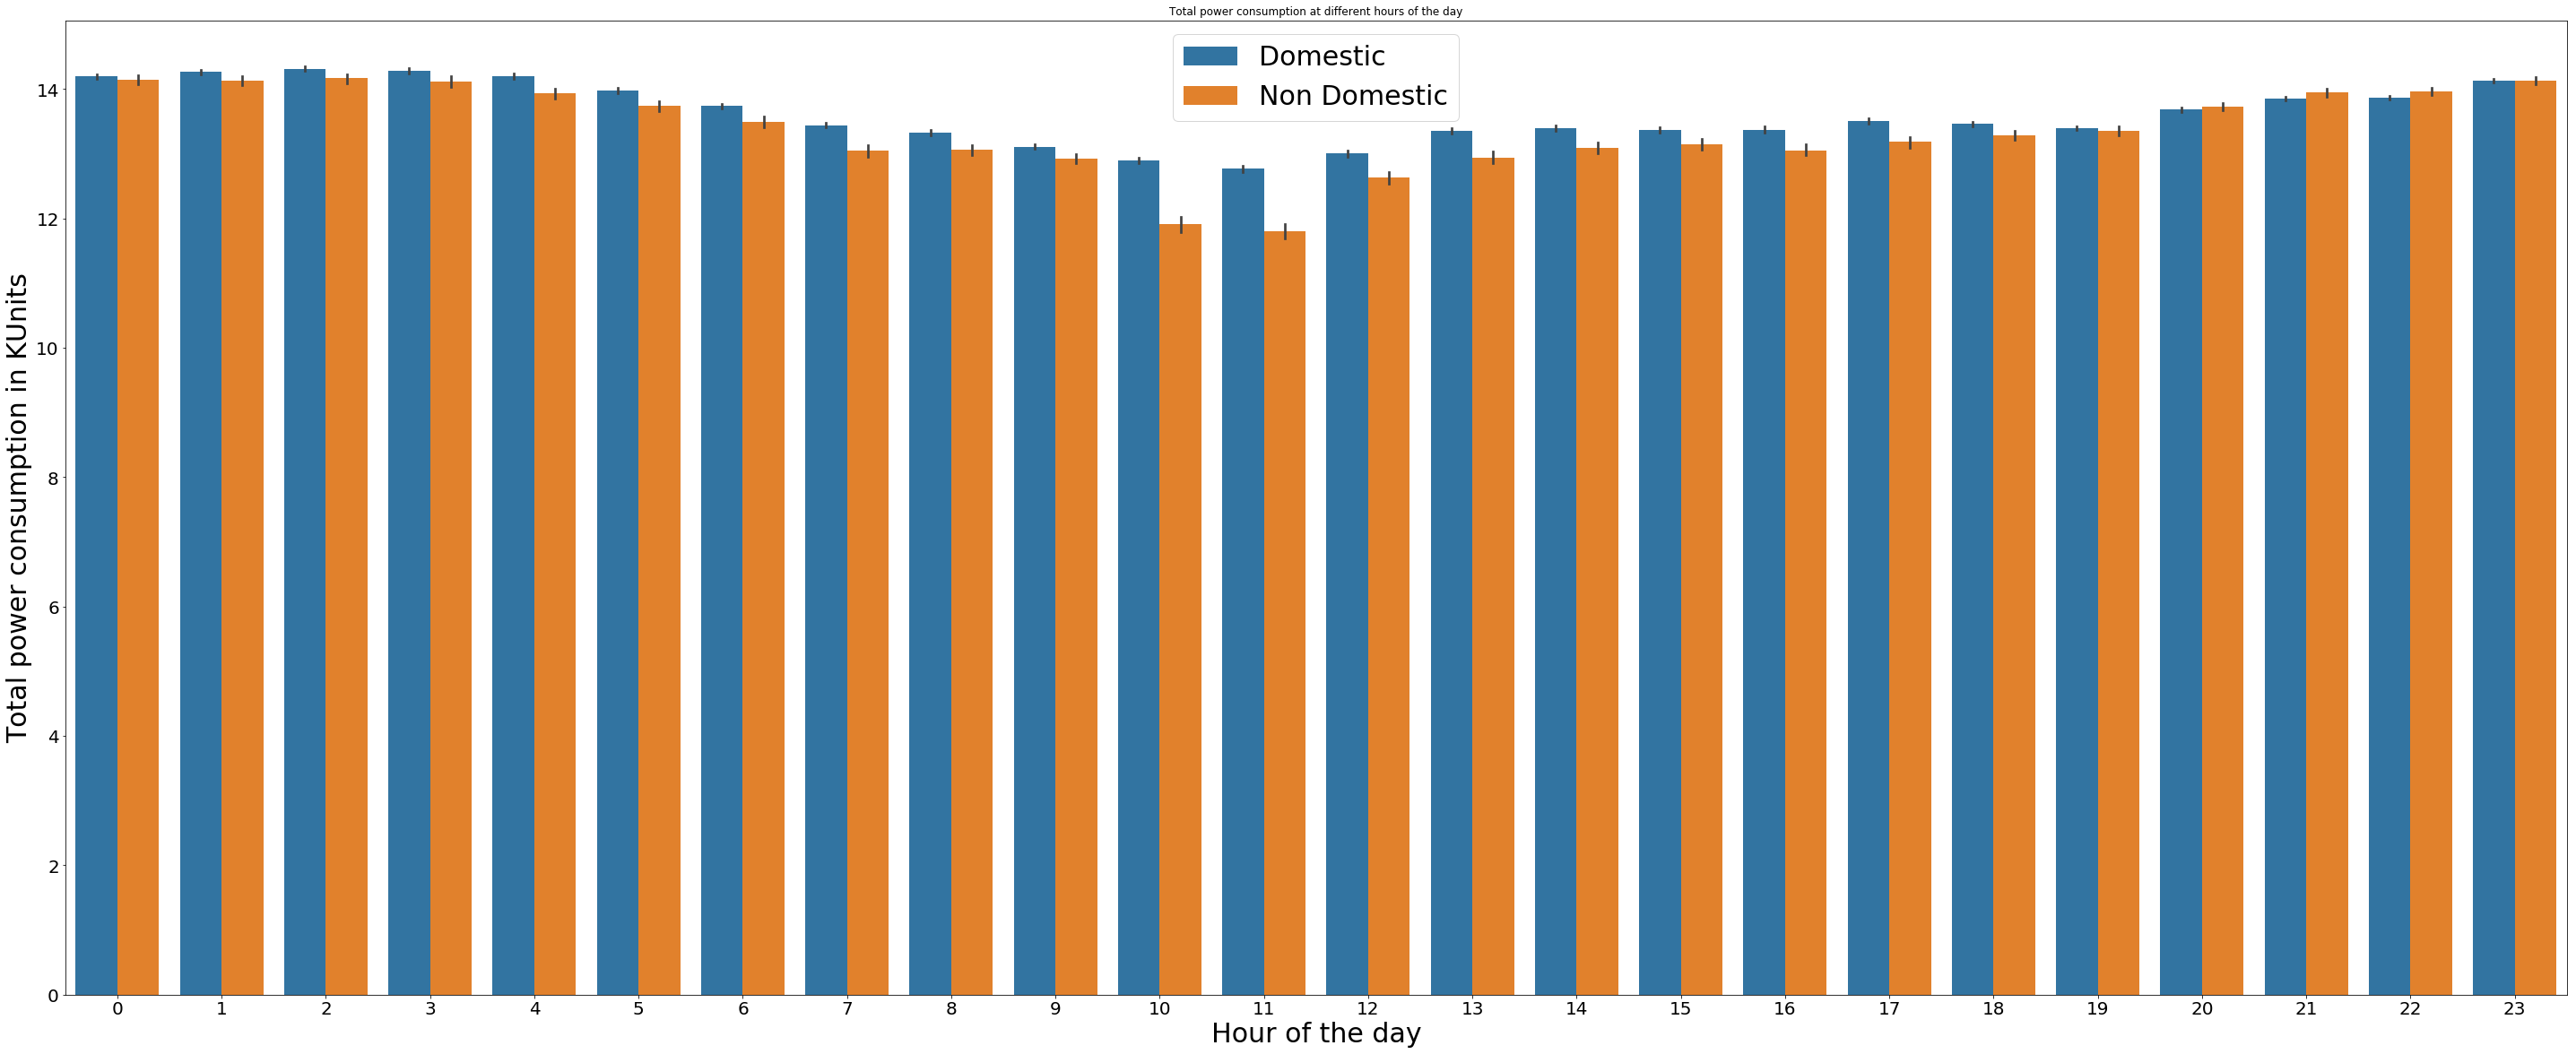

In [74]:
plt.figure(figsize=(50,20))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 


ax=sns.barplot(x='Hour of the day',y='Total power in KUnits',hue='Connection type',data=df1)
ax.set_xticklabels(ax.get_xticklabels())
plt.title('Total power consumption at different hours of the day')
plt.legend(loc=9, prop={'size': 30})
plt.xlabel('Hour of the day', fontsize=30)
plt.ylabel('Total power consumption in KUnits', fontsize=30)
plt.show()

observation: Both Domestic and Non Dimestic connections have same type of variation of power consumption through out the day.

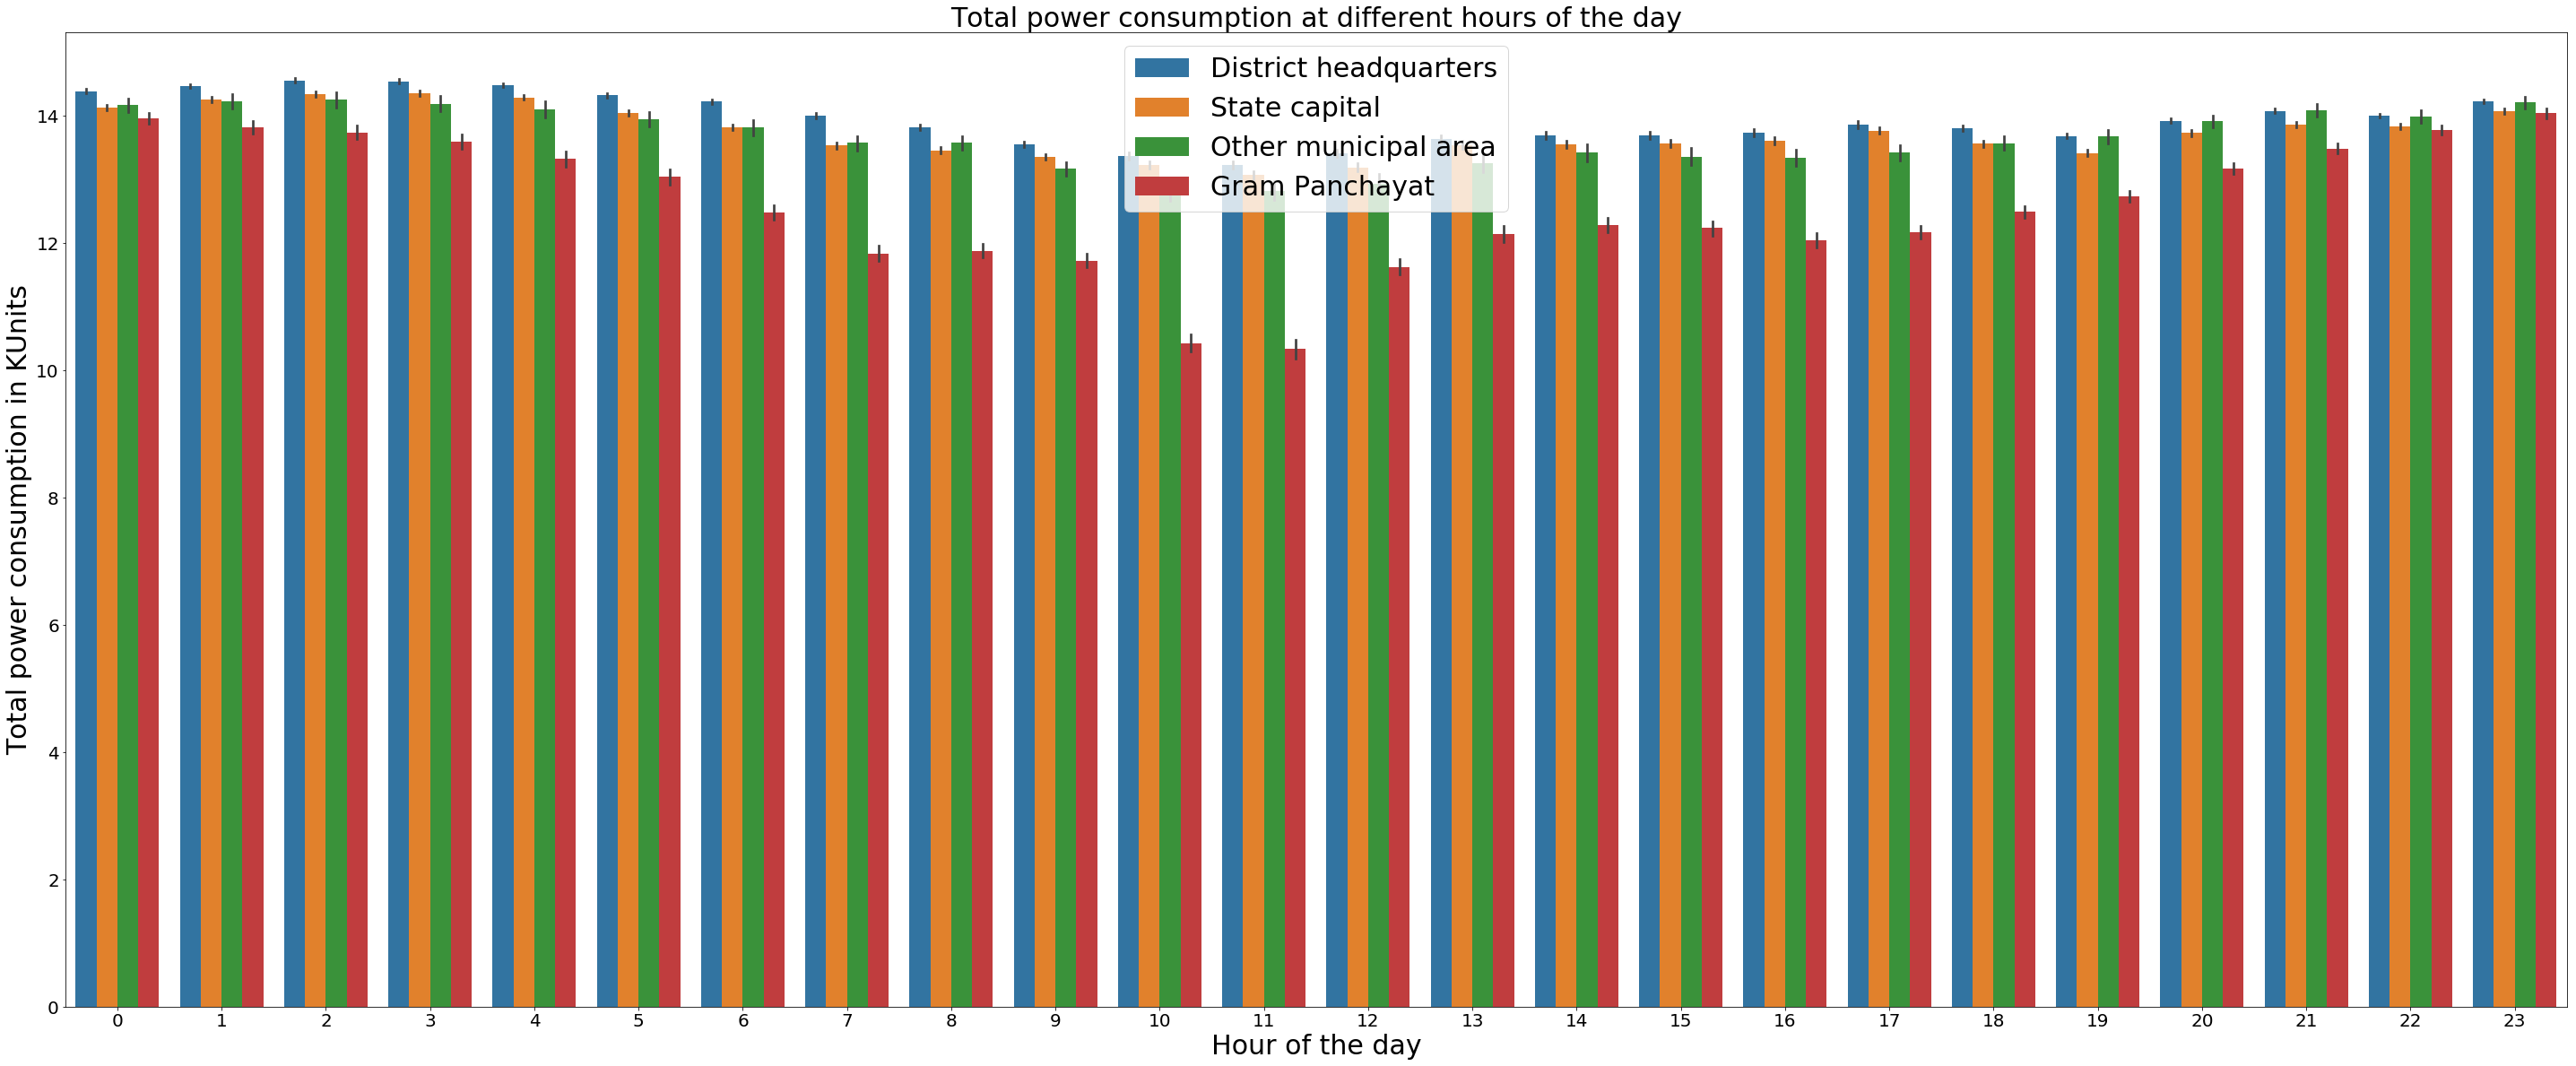

In [145]:
plt.figure(figsize=(50,20))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 


ax=sns.barplot(x='Hour of the day',y='Total power in KUnits',hue='Revenue classification',data=df1)
ax.set_xticklabels(ax.get_xticklabels())
plt.title('Total power consumption at different hours of the day', fontsize=30)
plt.legend(loc=9, prop={'size': 30})
plt.xlabel('Hour of the day', fontsize=30)
plt.ylabel('Total power consumption in KUnits', fontsize=30)

plt.show()

In [156]:
df1['Date']=pd.to_datetime(df1['Date'],dayfirst=True)


In [157]:
df1['Date'].dtype

dtype('<M8[ns]')

In [185]:
df1['month']=df1.Date.dt.month
df1['Year']=df1.Date.dt.year
df_month_year=df1.groupby(['month','Year'],as_index=False)['Total power in KUnits'].sum()


In [186]:
df_month_year

,month,Year,Total power in KUnits
0,1,2016,199885.131
1,1,2017,247548.042
2,1,2018,184670.717
3,2,2016,172545.649
4,2,2017,226317.618
5,2,2018,222102.810
6,3,2016,194444.381
7,3,2017,280933.179
8,3,2018,230808.540
9,4,2016,186819.851


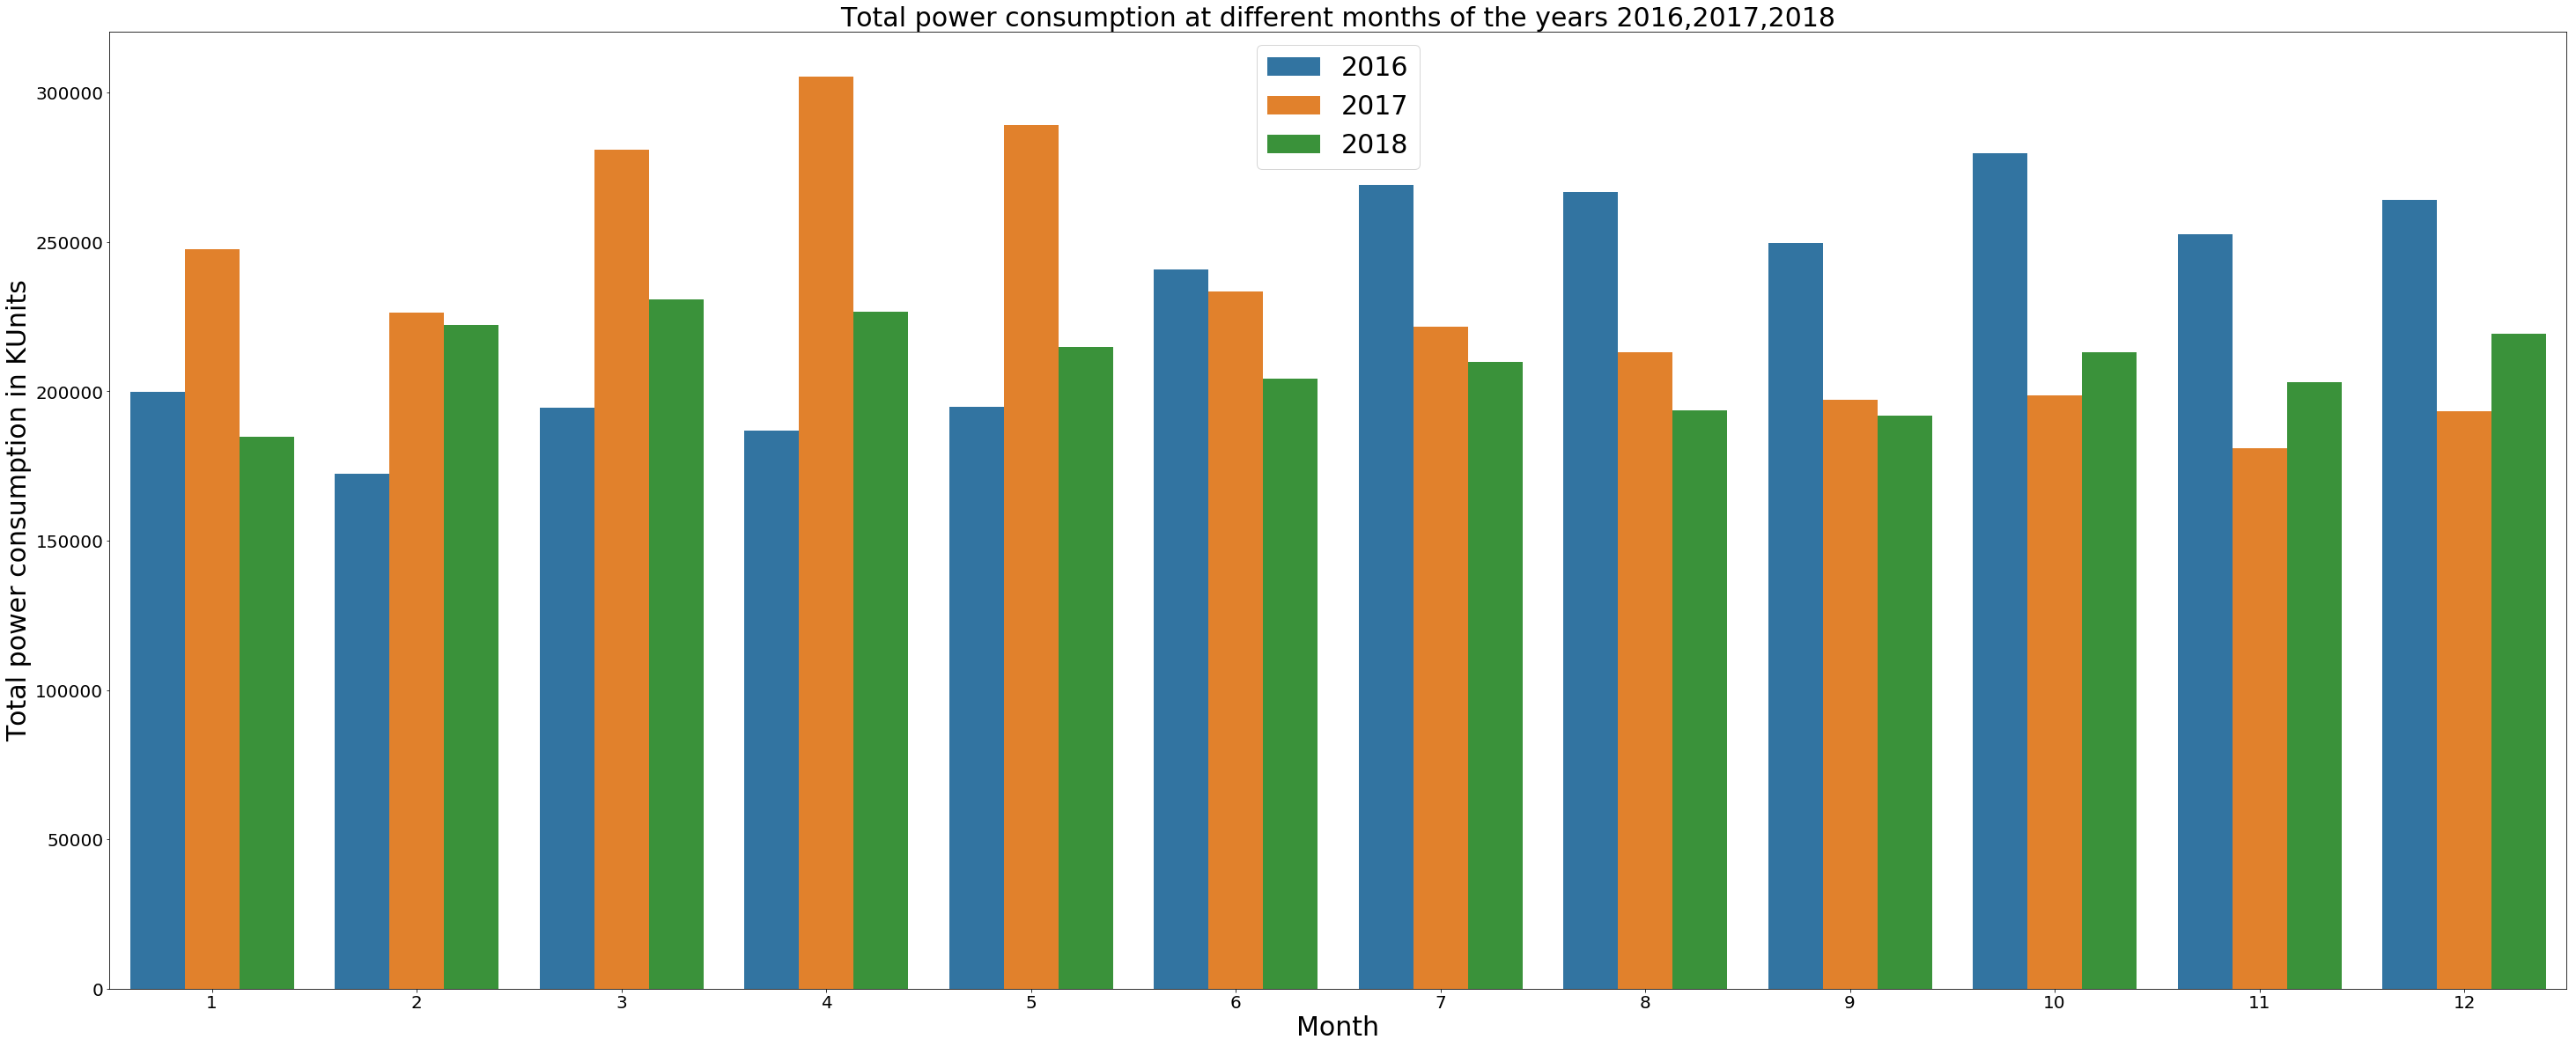

In [187]:
plt.figure(figsize=(50,20))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 


ax=sns.barplot(x='month',y='Total power in KUnits',hue='Year',data=df_month_year)
ax.set_xticklabels(ax.get_xticklabels())
plt.title('Total power consumption at different months of the years 2016,2017,2018', fontsize=30)
plt.legend(loc=9, prop={'size': 30})
plt.xlabel('Month', fontsize=30)
plt.ylabel('Total power consumption in KUnits', fontsize=30)

plt.show()

observation:
## 2016:
1) Variation in power consumption is not varying much from janaury to May and there is a spike power consumption during rainy and winter months.

2) This might be due to frequent power cuts during summer month.

3) In the month of october we can see highest power consumption. This might be due to occurance of prominent festivals.

## 2017:
1) Highest power consumption is in the month of April.

2) One can see a trend of power consumption increasing from febrauary till April and it is decreasing as the rainy and winter arrives. This is due to utilization of cooling systems during summer months.
## 2018:
1) Similar to 2017 in 2018 there is a general increase of power consumption during summer months and comparitively less power consumption during winter.

Here it can be observed that the fluctuation during 2016 has reduced in 2017 and in 2018 it is almost stabilized as in 2018 power consumption is least of the three. This might be due to improved maintanence of power grids or increase in price per unit of power consumption or improved efficiency of power consuming devices. 

In [188]:
df_mon_yr_conn=df1.groupby(['month','Year','Connection type'],as_index=False)['Total power in KUnits'].sum()
df_mon_yr_conn

,month,Year,Connection type,Total power in KUnits
0,1,2016,Domestic,170169.857
1,1,2016,Non Domestic,29715.274
2,1,2017,Domestic,196273.641
3,1,2017,Non Domestic,51274.401
4,1,2018,Domestic,139223.634
5,1,2018,Non Domestic,45447.083
6,2,2016,Domestic,154248.677
7,2,2016,Non Domestic,18296.972
8,2,2017,Domestic,184079.179
9,2,2017,Non Domestic,42238.439


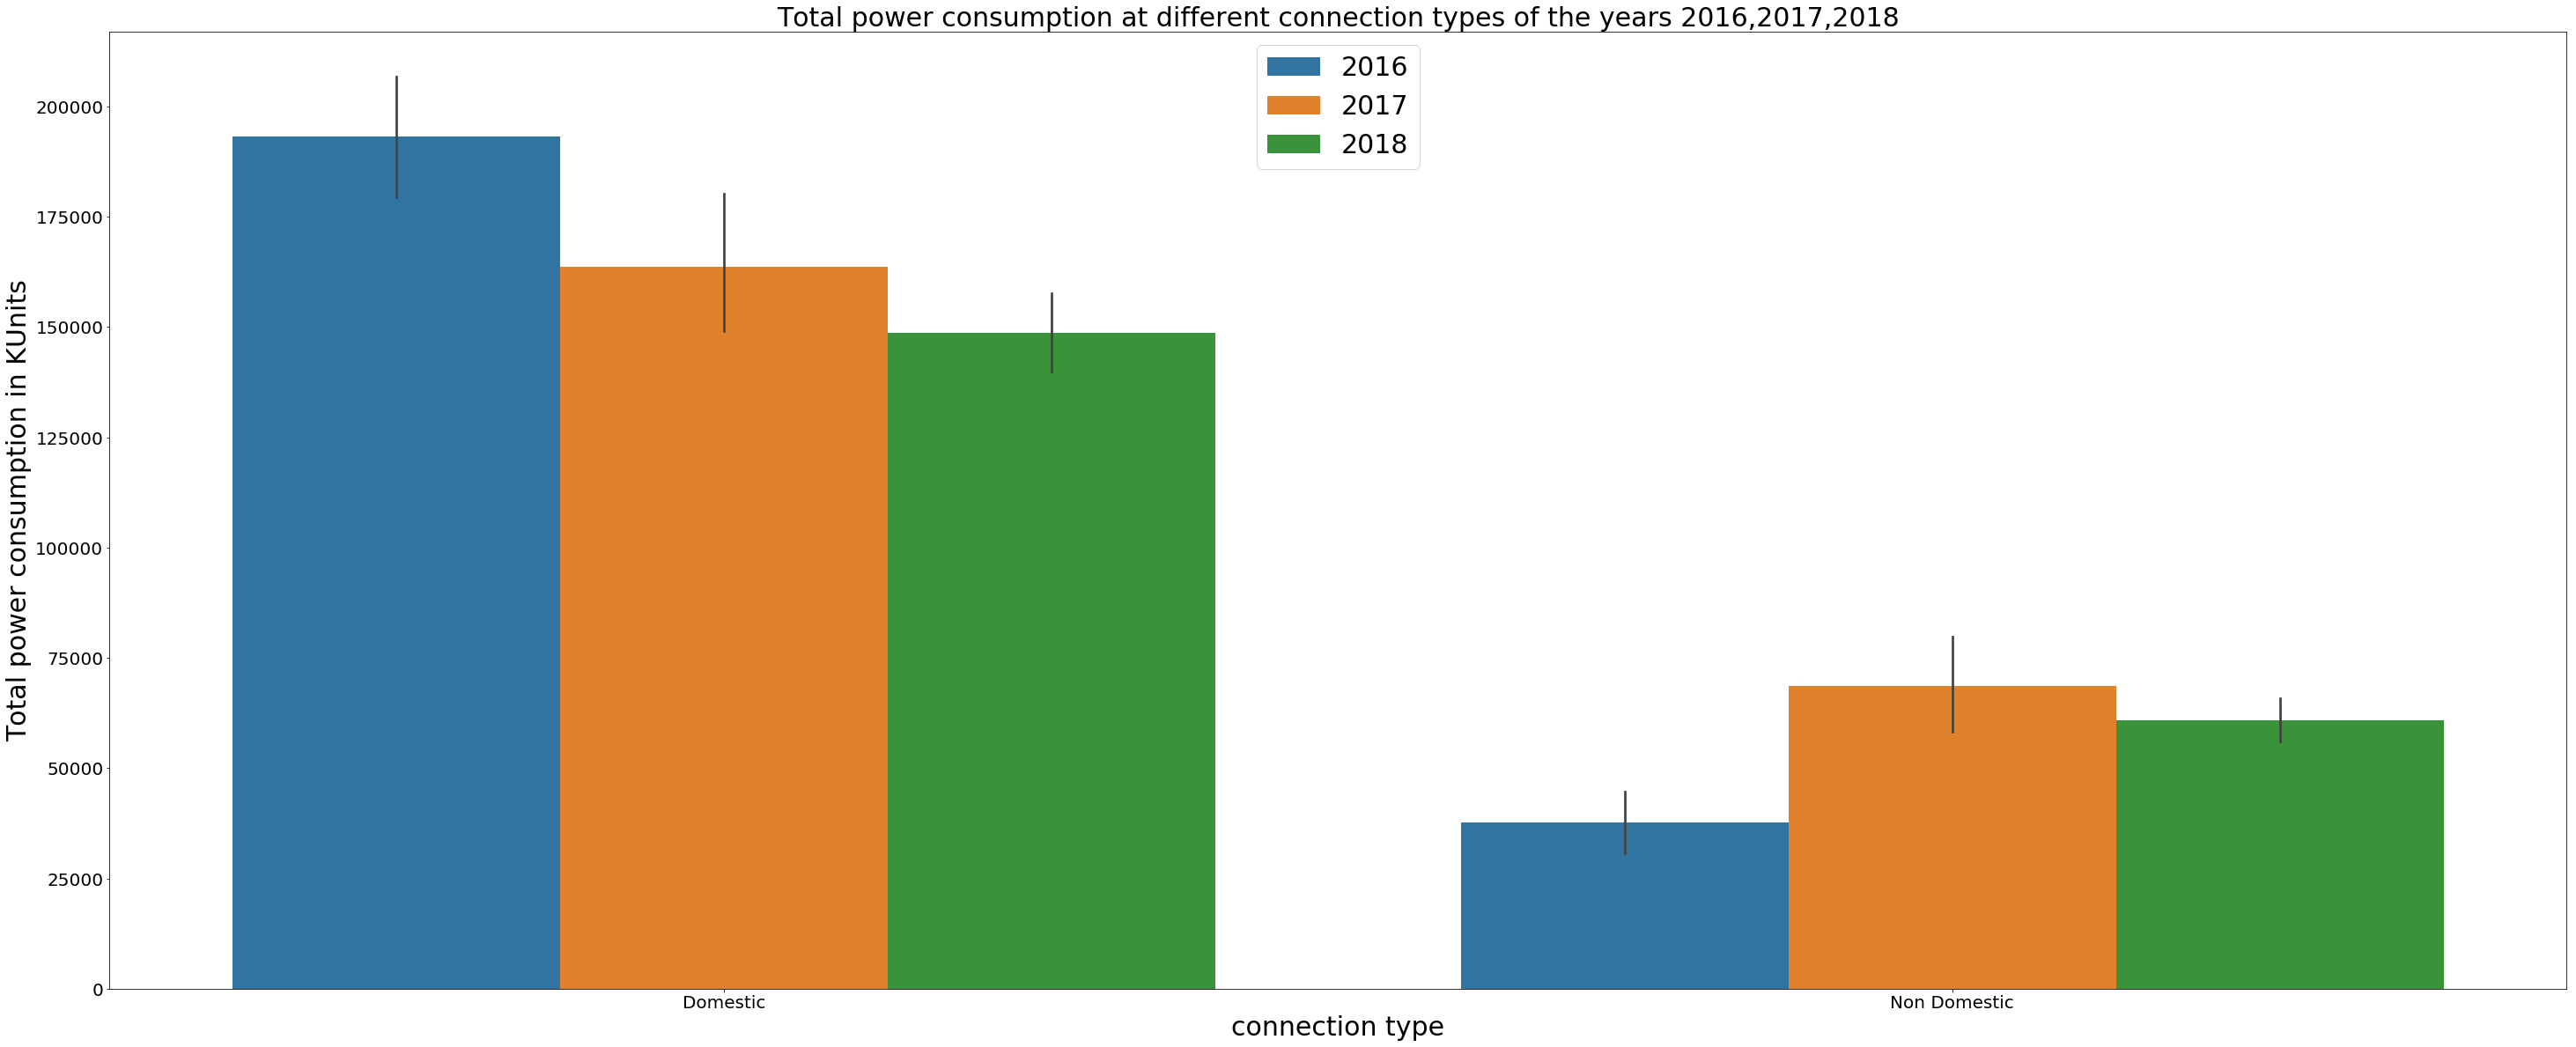

In [192]:
plt.figure(figsize=(50,20))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 


ax=sns.barplot(x='Connection type',y='Total power in KUnits',hue='Year',data=df_mon_yr_conn)
ax.set_xticklabels(ax.get_xticklabels())
plt.title('Total power consumption at different connection types of the years 2016,2017,2018', fontsize=30)
plt.legend(loc=9, prop={'size': 30})
plt.xlabel('connection type', fontsize=30)
plt.ylabel('Total power consumption in KUnits', fontsize=30)

plt.show()

observation:
Generally in all the 3 years Domestic power consumption is higher than non domestic consumption and in the year 2017 non domestic consumption is higher than 2016 and 2018.

In [191]:
df_mon_yr_town=df1.groupby(['month','Year','Town'],as_index=False)['Total power in KUnits'].sum()
df_mon_yr_town

,month,Year,Town,Total power in KUnits
0,1,2016,Belgaum,31479.942
1,1,2016,Bengaluru,104095.684
2,1,2016,Brahmavar,10521.446
3,1,2016,Mudur,6408.057
4,1,2016,Nakre,9746.628
5,1,2016,Siddhapura,9823.945
6,1,2016,Udupi,18186.658
7,1,2016,Yadthare,9622.771
8,1,2017,Belgaum,91561.281
9,1,2017,Bengaluru,107334.724


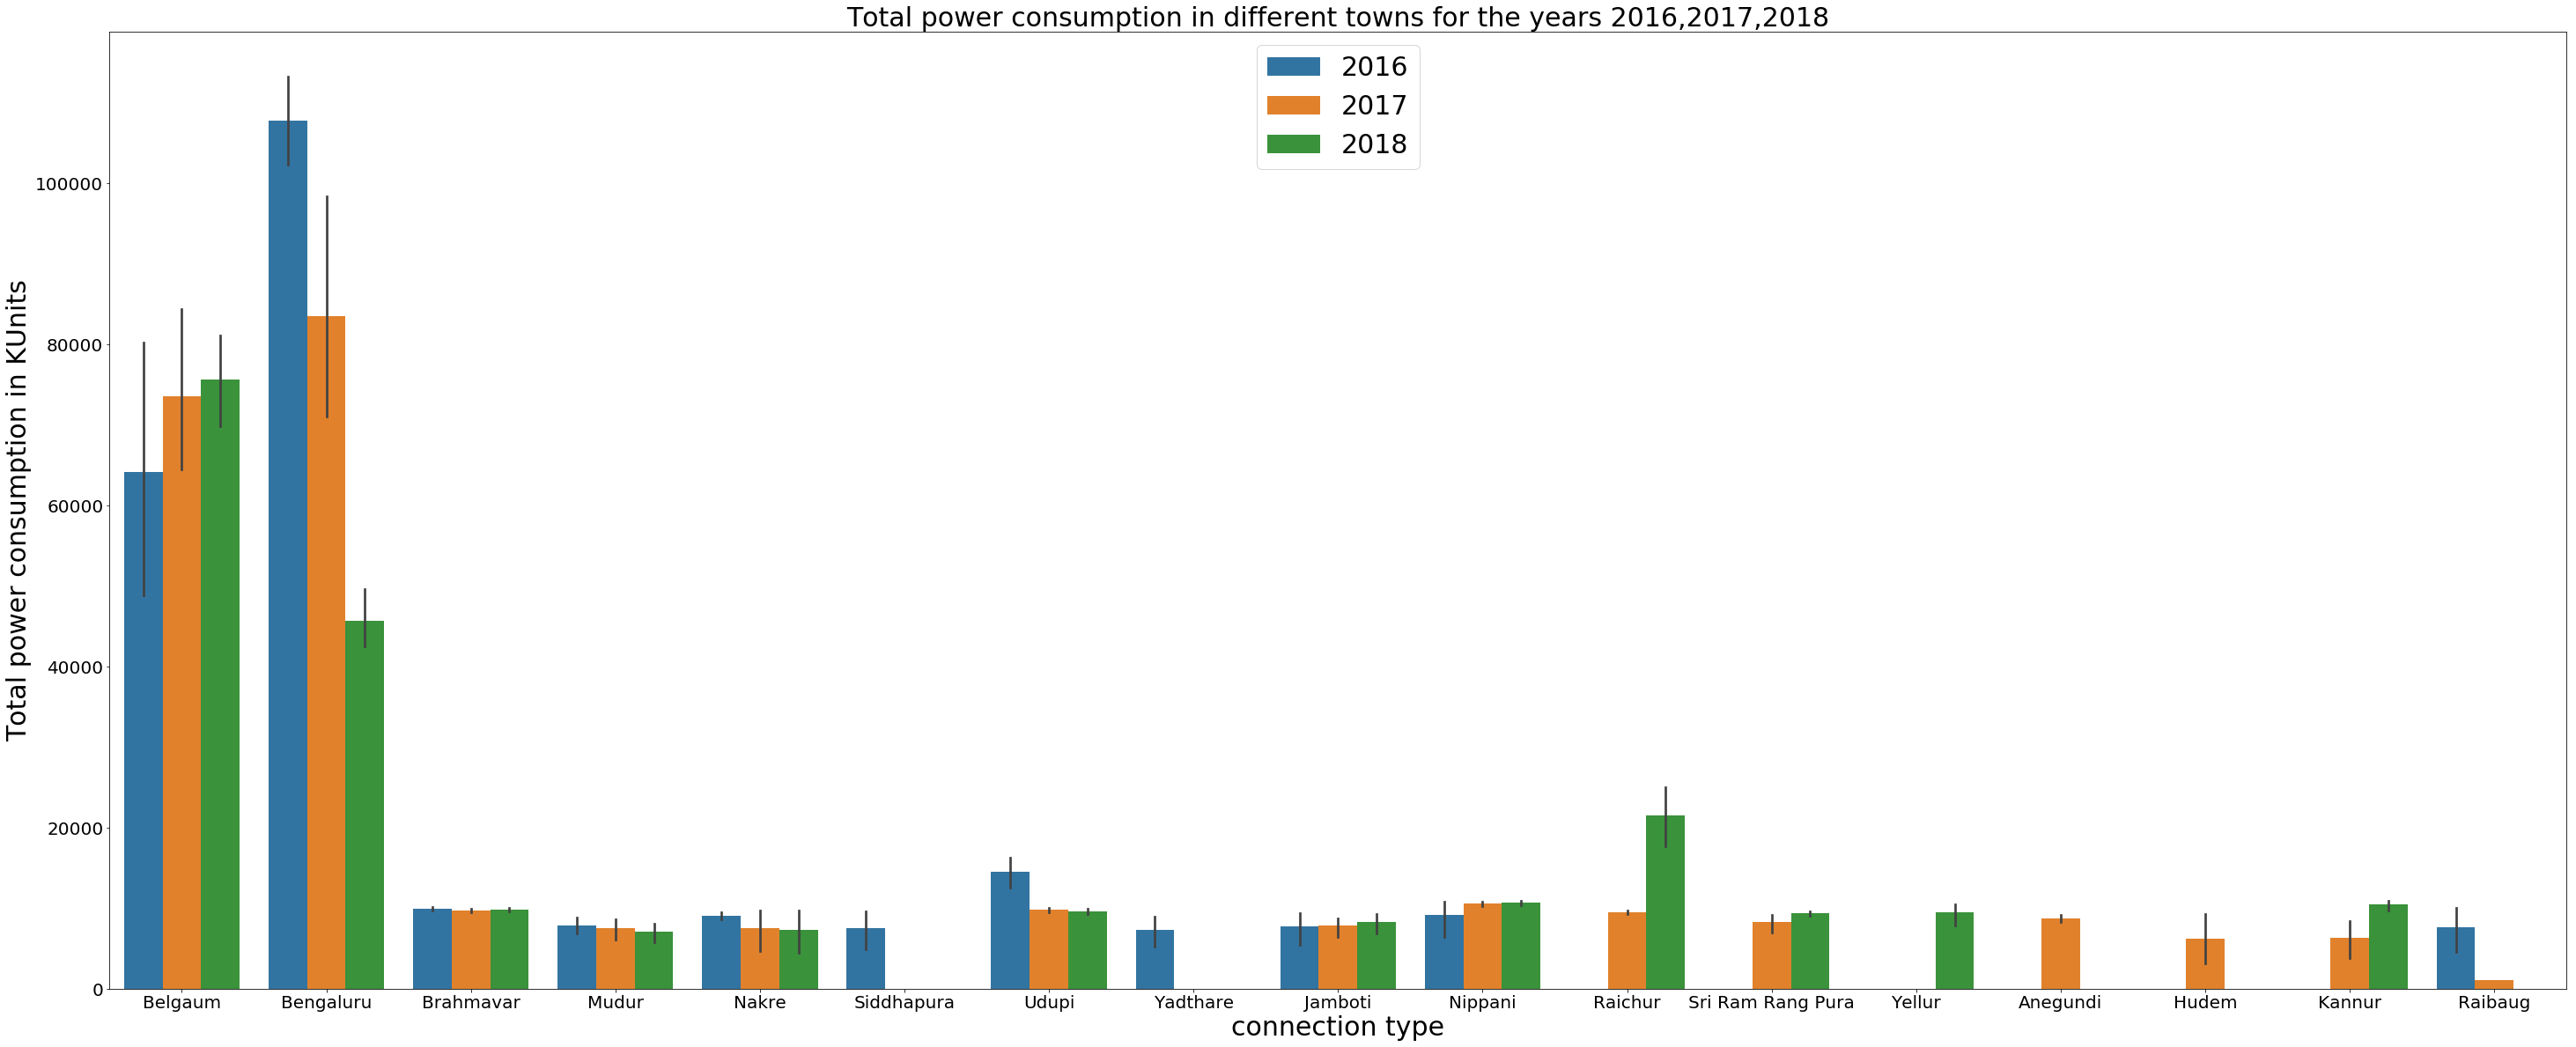

In [197]:
plt.figure(figsize=(50,20))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 


ax=sns.barplot(x='Town',y='Total power in KUnits',hue='Year',data=df_mon_yr_town)
ax.set_xticklabels(ax.get_xticklabels())
plt.title('Total power consumption in different towns for the years 2016,2017,2018', fontsize=30)
plt.legend(loc=9, prop={'size': 30})
plt.xlabel('connection type', fontsize=30)
plt.ylabel('Total power consumption in KUnits', fontsize=30)

plt.show()

observation:
It can be clearly seen that year on year power consumption is increasing in Belgaum and decreasing in Banglore. But it has become difficult to decide whether Belgaum is growing or Bangalore has adopted more efficient transmission system and electrical devices. With this there is a need of data regarding oter entities which influence power consumption.

Next steps would creating ML model which could predict power consumption in the given towns in a given period of time in the future. So that provisioning can be made to accomodate increasing demand and implementation of more efficient systems.